[IPython Notebook](RV.ipynb) |  [Python Script](RV.py)

RV Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSets which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach both these ParameterSets for us.

In [3]:
ps, constraints = phoebe.dataset.rv()
print ps

ParameterSet: 3 parameters
                  times@_default: [] d
                    rvs@_default: [] km / s
                 sigmas@_default: [] km / s


In [4]:
ps_dep = phoebe.dataset.rv_dep()
print ps_dep

ParameterSet: 3 parameters
                ld_func@_default: interp
              ld_coeffs@_default: [ 0.5  0.5]
                        passband: Johnson:V


For information on these passband-dependent parameters, see the section on the [LC Dataset](LC) (these are used only to compute fluxes when rv_method=='flux-weighted')

### times

In [5]:
print ps['times']

Parameter: times@_default
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### rvs

In [6]:
print ps['rvs']

Parameter: rvs@_default
                       Qualifier: rvs
                     Description: Observed radial velocity
                           Value: [] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [7]:
print ps['sigmas']

Parameter: sigmas@_default
                       Qualifier: sigmas
                     Description: Observed uncertainty on rv
                           Value: [] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the RV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [ORB dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision (used if rv_method=='flux-weighted') are explained in the section on the [MESH dataset](MESH)
* parameters related to computing fluxes (used if rv_method=='flux-weighted') are explained in the section on the [LC dataset](LC)

In [8]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 24 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                              gr: False
                        stepsize: 0.01
                      integrator: ias15
                            refl: False
                       protomesh: False
                          pbmesh: False
            mesh_method@_default: marching
                  delta@_default: 0.1
              maxpoints@_default: 100000
      distortion_method@_default: roche
               gridsize@_default: 40
                     mesh_offset: True
                  eclipse_method: native
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: None
  fti_oversample@_default@_de...: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False
    etv_method@_default@_default: crossing
       etv_tol@_default@_default: 0.0001

### rv_method

In [9]:
print ps_compute['rv_method']

Parameter: rv_method@_default@_default
                       Qualifier: rv_method
                     Description: Method to use for computing RVs (must be flux-weighted for Rossiter-McLaughlin)
                           Value: flux-weighted
                         Choices: flux-weighted, dynamical



If rv_method is set to 'dynamical' then the computed radial velocities are simply the z-velocities of the centers of mass of each component.  In this case, only the dynamical options are relevant.  For more details on these, see the section on the [ORB Dataset](ORB).

If rv_method is set to 'flux-weighted' then radial velocities are determined by the z-velocity of each visible surface element of the mesh, weighted by their respective intensities.  Since the stars are placed in their orbits by the dynamic options, the section on the [ORB Dataset](ORB) is still applicable.  So are the meshing options described in [MESH Dataset](MESH) and the options for computing fluxes in [LC Dataset](LC).

### rv_grav

In [10]:
print ps_compute['rv_grav']

Parameter: rv_grav@_default@_default
                       Qualifier: rv_grav
                     Description: Whether gravitational redshift effects are enabled for RVs
                           Value: False
                 Only visible if: rv_method:flux-weighted



See the [Gravitational Redshift Example Script](../examples/grav_redshift) for more details on the influence this parameter has on radial velocities.

Synthetics
------------------

In [11]:
b.add_dataset('rv', times=np.linspace(0,3,101), dataset='rv01')

<ParameterSet: 9 parameters | kinds: rv, rv_dep>

In [12]:
b.add_compute()

<ParameterSet: 22 parameters | components: primary, secondary>

In [13]:
b.run_compute()

<ParameterSet: 4 parameters | components: primary, secondary>

In [14]:
b['rv@model'].twigs

['times@primary@rv01@phoebe01@latest@rv@model',
 'rvs@primary@rv01@phoebe01@latest@rv@model',
 'times@secondary@rv01@phoebe01@latest@rv@model',
 'rvs@secondary@rv01@phoebe01@latest@rv@model']

In [15]:
print b['times@primary@rv@model']

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Observed times
                           Value: [ 0.    0.03  0.06  0.09  0.12  0.15  0.18  0.21  0.24  0.27  0.3   0.33
  0.36  0.39  0.42  0.45  0.48  0.51  0.54  0.57  0.6   0.63  0.66  0.69
  0.72  0.75  0.78  0.81  0.84  0.87  0.9   0.93  0.96  0.99  1.02  1.05
  1.08  1.11  1.14  1.17  1.2   1.23  1.26  1.29  1.32  1.35  1.38  1.41
  1.44  1.47  1.5   1.53  1.56  1.59  1.62  1.65  1.68  1.71  1.74  1.77
  1.8   1.83  1.86  1.89  1.92  1.95  1.98  2.01  2.04  2.07  2.1   2.13
  2.16  2.19  2.22  2.25  2.28  2.31  2.34  2.37  2.4   2.43  2.46  2.49
  2.52  2.55  2.58  2.61  2.64  2.67  2.7   2.73  2.76  2.79  2.82  2.85
  2.88  2.91  2.94  2.97  3.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [16]:
print b['rvs@primary@rv@model']

Parameter: rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Observed radial velocity
                           Value: [ -2.15033262e+00  -1.34123286e+01  -1.37204168e+01  -1.46102212e+01
  -1.67855711e+01  -2.08482507e+01  -2.48360059e+01  -2.87256978e+01
  -3.25012607e+01  -3.61493715e+01  -3.96536594e+01  -4.30030475e+01
  -4.61813207e+01  -4.91780332e+01  -5.19804844e+01  -5.45770120e+01
  -5.69588354e+01  -5.91152336e+01  -6.10385584e+01  -6.27209099e+01
  -6.41559273e+01  -6.53375379e+01  -6.62612324e+01  -6.69242957e+01
  -6.73220319e+01  -6.74567347e+01  -6.73211063e+01  -6.69227701e+01
  -6.62597274e+01  -6.53346213e+01  -6.41527020e+01  -6.27166077e+01
  -6.10330900e+01  -5.91100061e+01  -5.69526468e+01  -5.45705306e+01
  -5.19743255e+01  -4.91720451e+01  -4.61752004e+01  -4.29969361e+01
  -3.96493892e+01  -3.61442089e+01  -3.24975572e+01  -2.87214163e+01
  -2.48315988e+01  -2.08445332e+01  -1.67753189e+01  -1.26394986e+01
  -8.

Plotting
---------------

By default, RV datasets plot as 'rvs' vs 'times'.

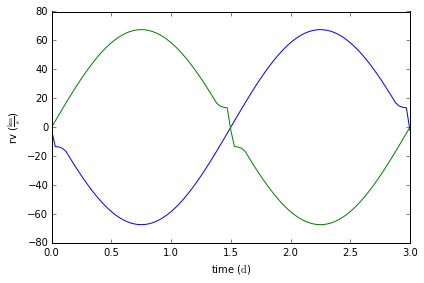

In [17]:
axs, artists = b['rv@model'].plot()

Since these are the only two columns available in the synthetic model, the only other options is to plot in phase instead of time.

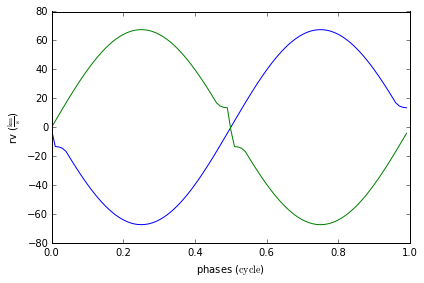

In [18]:
axs, artists = b['rv@model'].plot(x='phases')

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [19]:
b['period'].components

['binary', 'primary', 'secondary']

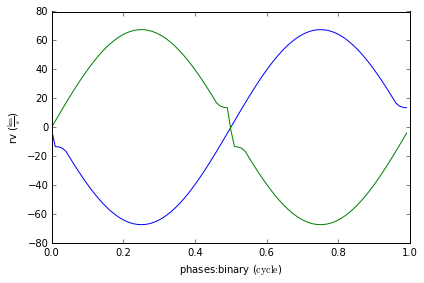

In [20]:
axs, artists = b['rv@model'].plot(x='phases:binary')

Mesh Fields
---------------------

If a mesh dataset exists at any of the same times as the time array in the rv dataset, OR if pbmesh is set to True in the compute options, then radial velocities for each surface element will be available in the model as well (only if mesh_method=='flux_weighted').

Since the radial velocities are flux-weighted, the flux-related quantities are also included.  For a description of these, see the section on the [LC Dataset](LC).

Let's add a single mesh at the first time of the rv dataset and re-call run_compute

In [21]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [22]:
b.run_compute()

<ParameterSet: 68 parameters | kinds: rv, mesh>

In [23]:
print b['model'].datasets

['mesh01', 'rv01']


These new columns are stored with the rv's dataset tag, but with the mesh model-kind.

In [24]:
b.filter(dataset='rv01', kind='mesh', context='model').twigs

['0.0@pblum@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@ampl_boosts@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@rvs@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@pblum@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@ampl_boosts@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@rvs@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@intensities@secondary@rv01@phoebe01@latest@mesh@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [MESH dataset](MESH)), but since the mesh elements are stored with the 'mesh01' dataset tag, and the rv (including flux-related) quantities are stored with the 'rv01' dataset tag, it is important not to provide the 'mesh01' dataset tag before plotting.

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


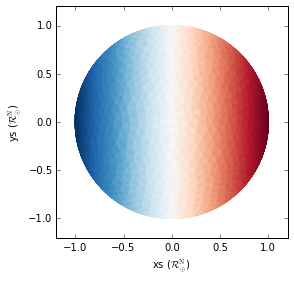

In [25]:
axs, artists = b['mesh@model'].plot(facecolor='rvs', edgecolor=None)
# NOT:
# axs, artists = b['mesh01@model'].plot(facecolor='rv', edgecolor=None)

### rvs

In [26]:
print b['rvs@primary@rv01@mesh@model']

Parameter: 0.0@rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Per-element value for rv01 dataset
                           Value: [ -1.04307016e-01  -3.48430615e-08   1.04307243e-01 ...,   1.54928801e+00
   1.61647665e+00   1.65364353e+00] solRad / d
                  Constrained by: 
                      Constrains: None
                      Related to: None

